# 1. 导言

在前几个章节中，我们学习了关于回归和分类的算法，同时也讨论了如何将这些方法集成为强大的算法的集成学习方式，分别是Bagging和Boosting。本章我们继续讨论集成学习方法的最后一个成员--Stacking，这个集成方法在比赛中被称为“懒人”算法，因为它不需要花费过多时间的调参就可以得到一个效果不错的算法，同时，这种算法也比前两种算法容易理解的多，因为这种集成学习的方式不需要理解太多的理论，只需要在实际中加以运用即可。 stacking严格来说并不是一种算法，而是精美而又复杂的，对模型集成的一种策略。Stacking集成算法可以理解为一个两层的集成，第一层含有多个基础分类器，把预测的结果(元特征)提供给第二层， 而第二层的分类器通常是逻辑回归，他把一层分类器的结果当做特征做拟合输出预测结果。在介绍Stacking之前，我们先来对简化版的Stacking进行讨论，也叫做Blending，接着我们对Stacking进行更深入的讨论。

# 2. Blending集成学习算法

不知道大家小时候有没有过这种经历：老师上课提问到你，那时候你因为开小差而无法立刻得知问题的答案。就在你彷徨的时候，由于你平时人缘比较好，因此周围的同学向你伸出援手告诉了你他们脑中的正确答案，因此你对他们的答案加以总结和分析最终的得出正确答案。相信大家都有过这样的经历，说这个故事的目的是为了引出集成学习家族中的Blending方式，这种集成方式跟我们的故事是十分相像的。如图：(图片来源：https://blog.csdn.net/maqunfi/article/details/82220115)                                                                     

![jupyter](./1.png)                                                   
下面我们来详细讨论下这个Blending集成学习方式：                             
   - (1) 将数据划分为训练集和测试集(test_set)，其中训练集需要再次划分为训练集(train_set)和验证集(val_set)；
   - (2) 创建第一层的多个模型，这些模型可以使同质的也可以是异质的；
   - (3) 使用train_set训练步骤2中的多个模型，然后用训练好的模型预测val_set和test_set得到val_predict, test_predict1；
   - (4) 创建第二层的模型,使用val_predict作为训练集训练第二层的模型；
   - (5) 使用第二层训练好的模型对第二层测试集test_predict1进行预测，该结果为整个测试集的结果。                        
   
![jupyter](./2.png)                               
(图片来源：https://blog.csdn.net/sinat_35821976/article/details/83622594)                                                                          

在这里，笔者先来梳理下这个过程：                             
在(1)步中，总的数据集被分成训练集和测试集，如80%训练集和20%测试集，然后在这80%的训练集中再拆分训练集70%和验证集30%，因此拆分后的数据集由三部分组成：训练集80%* 70%
、测试集20%、验证集80%* 30% 。训练集是为了训练模型，测试集是为了调整模型(调参)，测试集则是为了检验模型的优度。                                             
在(2)-(3)步中，我们使用训练集创建了K个模型，如SVM、random forests、XGBoost等，这个是第一层的模型。 训练好模型后将**验证集**输入模型进行预测，得到K组不同的输出，我们记作$A_1,...,A_K$，然后将测试集输入K个模型也得到K组输出，我们记作$B_1,...,B_K$，其中$A_i$的样本数与验证集一致，$B_i$的样本数与测试集一致。如果总的样本数有10000个样本，那么使用5600个样本训练了K个模型，输入验证集2400个样本得到K组2400个样本的结果$A_1,...,A_K$，输入测试集2000个得到K组2000个样本的结果$B_1,...,B_K$ 。                             
在(4)步中，我们使用K组2400个样本的验证集结果$A_1,...,A_K$作为第二层分类器的特征，验证集的2400个标签为因变量，训练第二层分类器，得到2400个样本的输出。                                  
在(5)步中，将输入测试集2000个得到K组2000个样本的结果$B_1,...,B_K$放入第二层分类器，得到2000个测试集的预测结果。                                        

![jupyter](./3.jpg)

以上是Blending集成方式的过程，接下来我们来分析这个集成方式的优劣：                                          
其中一个最重要的优点就是实现简单粗暴，没有太多的理论的分析。但是这个方法的缺点也是显然的：blending只使用了一部分数据集作为留出集进行验证，也就是只能用上数据中的一部分，实际上这对数据来说是很奢侈浪费的。                                                          
关于这个缺点，我们以后再做改进，我们先来用一些案例来使用这个集成方式。

In [1]:
# 加载相关工具包
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
# 创建数据
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
data, target = make_blobs(n_samples=10000, centers=2,
                          random_state=1, cluster_std=1.0)
# 创建训练集和测试集
X_train1, X_test, y_train1, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)
# 创建训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, test_size=0.3, random_state=1)
print("The shape of training X:", X_train.shape)
print("The shape of training y:", y_train.shape)
print("The shape of test X:", X_test.shape)
print("The shape of test y:", y_test.shape)
print("The shape of validation X:", X_val.shape)
print("The shape of validation y:", y_val.shape)

The shape of training X: (5600, 2)
The shape of training y: (5600,)
The shape of test X: (2000, 2)
The shape of test y: (2000,)
The shape of validation X: (2400, 2)
The shape of validation y: (2400,)


In [3]:
#  设置第一层分类器
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

clfs = [SVC(probability=True), RandomForestClassifier(
    n_estimators=5, n_jobs=-1, criterion='gini'), KNeighborsClassifier()]

# 设置第二层分类器
lr = LinearRegression()

In [4]:
# 输出第一层的验证集结果与测试集结果
val_features = np.zeros((X_val.shape[0], len(clfs)))  # 初始化验证集结果
test_features = np.zeros((X_test.shape[0], len(clfs)))  # 初始化测试集结果

for i, clf in enumerate(clfs):
    clf.fit(X_train, y_train)
    val_feature = clf.predict_proba(X_val)[:, 1]
    test_feature = clf.predict_proba(X_test)[:, 1]
    val_features[:, i] = val_feature
    test_features[:, i] = test_feature

In [5]:
# 将第一层的验证集的结果输入第二层训练第二层分类器
from sklearn.model_selection import cross_val_score
lr.fit(val_features, y_val)
# 输出预测的结果
cross_val_score(lr, test_features, y_test, cv=5)

array([1., 1., 1., 1., 1.])

可以看到，在每一折的交叉验证的效果都是非常好的，这个集成学习方法在这个数据集上是十分有效的，不过这个数据集是我们虚拟的，因此大家可以把他用在实际数据上看看效果。

**作业：                                  
留个小作业吧，我们刚刚的例子是针对人造数据集，表现可能会比较好一点，因为我们使用Blending方式对iris数据集进行预测，并用第四章的决策边界画出来，找找规律。**

# 3. Stacking集成学习算法

基于前面对Blending集成学习算法的讨论，我们知道：Blending在集成的过程中只会用到验证集的数据，对数据实际上是一个很大的浪费。为了解决这个问题，我们详细分析下Blending到底哪里出现问题并如何改进。在Blending中，我们产生验证集的方式是使用分割的方式，产生一组训练集和一组验证集，这让我们联想到交叉验证的方式。顺着这个思路，我们对Stacking进行建模(如下图)：                           

![jupyter](./4.jpg)                                               

   - 首先将所有数据集生成测试集和训练集（假如训练集为10000,测试集为2500行），那么上层会进行5折交叉检验，使用训练集中的8000条作为训练集，剩余2000行作为验证集（橙色）。                                         
   - 每次验证相当于使用了蓝色的8000条数据训练出一个模型，使用模型对验证集进行验证得到2000条数据，并对测试集进行预测，得到2500条数据，这样经过5次交叉检验，可以得到中间的橙色的5* 2000条验证集的结果(相当于每条数据的预测结果)，5* 2500条测试集的预测结果。                                           
   - 接下来会将验证集的5* 2000条预测结果拼接成10000行长的矩阵，标记为$A_1$，而对于5* 2500行的测试集的预测结果进行加权平均，得到一个2500一列的矩阵，标记为$B_1$。                            
   - 上面得到一个基模型在数据集上的预测结果$A_1$、$B_1$,这样当我们对3个基模型进行集成的话，相于得到了$A_1$、$A_2$、$A_3$、$B_1$、$B_2$、$B_3$六个矩阵。                            
   - 之后我们会将$A_1$、$A_2$、$A_3$并列在一起成10000行3列的矩阵作为training data,$B_1$、$B_2$、$B_3$合并在一起成2500行3列的矩阵作为testing  data，让下层学习器基于这样的数据进行再训练。              
   - 再训练是基于每个基础模型的预测结果作为特征（三个特征），次学习器会学习训练如果往这样的基学习的预测结果上赋予权重w，来使得最后的预测最为准确。

下面，我们来实际应用下Stacking是如何集成算法的：(参考案例：https://www.cnblogs.com/Christina-Notebook/p/10063146.html)                                                          
![jupyter](./5.png)                                  
**由于sklearn并没有直接对Stacking的方法，因此我们需要下载mlxtend工具包(pip install mlxtend)**

In [6]:
# 1. 简单堆叠3折CV分类
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

RANDOM_SEED = 42

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
clf3 = GaussianNB()
lr = LogisticRegression()

# Starting from v0.16.0, StackingCVRegressor supports
# `random_state` to get deterministic result.
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],  # 第一层分类器
                            meta_classifier=lr,   # 第二层分类器
                            random_state=RANDOM_SEED)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], ['KNN', 'Random Forest', 'Naive Bayes', 'StackingClassifier']):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" %
          (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.02) [Naive Bayes]
Accuracy: 0.93 (+/- 0.02) [StackingClassifier]


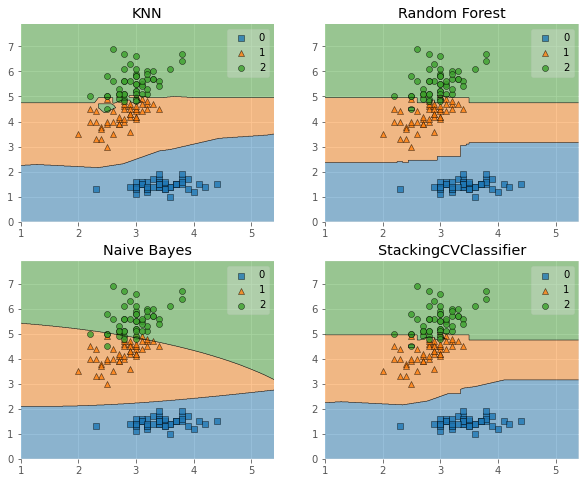

In [7]:
# 我们画出决策边界
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))
for clf, lab, grd in zip([clf1, clf2, clf3, sclf],
                         ['KNN',
                          'Random Forest',
                          'Naive Bayes',
                          'StackingCVClassifier'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)
plt.show()

使用第一层所有基分类器所产生的类别概率值作为meta-classfier的输入。需要在StackingClassifier 中增加一个参数设置：use_probas = True。

另外，还有一个参数设置average_probas = True,那么这些基分类器所产出的概率值将按照列被平均，否则会拼接。

例如：

基分类器1：predictions=[0.2,0.2,0.7]

基分类器2：predictions=[0.4,0.3,0.8]

基分类器3：predictions=[0.1,0.4,0.6]

1）若use_probas = True，average_probas = True，

    则产生的meta-feature 为：[0.233, 0.3, 0.7]

2）若use_probas = True，average_probas = False，

    则产生的meta-feature 为：[0.2,0.2,0.7,0.4,0.3,0.8,0.1,0.4,0.6]

In [8]:
# 2.使用概率作为元特征
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                            use_probas=True,  #
                            meta_classifier=lr,
                            random_state=42)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf],
                      ['KNN',
                       'Random Forest',
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X, y,
                             cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.02) [Naive Bayes]
Accuracy: 0.95 (+/- 0.02) [StackingClassifier]


In [9]:
# 3. 堆叠5折CV分类与网格搜索(结合网格搜索调参优化)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingCVClassifier

# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
clf3 = GaussianNB()
lr = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                            meta_classifier=lr,
                            random_state=42)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf,
                    param_grid=params,
                    cv=5,
                    refit=True)
grid.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.947 +/- 0.03 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.933 +/- 0.02 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.940 +/- 0.02 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.940 +/- 0.02 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.953 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.953 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.953 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.953 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier_

In [10]:
# 如果我们打算多次使用回归算法，我们要做的就是在参数网格中添加一个附加的数字后缀，如下所示：
from sklearn.model_selection import GridSearchCV

# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
clf3 = GaussianNB()
lr = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf1, clf2, clf3],
                            meta_classifier=lr,
                            random_state=RANDOM_SEED)

params = {'kneighborsclassifier-1__n_neighbors': [1, 5],
          'kneighborsclassifier-2__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf,
                    param_grid=params,
                    cv=5,
                    refit=True)
grid.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.940 +/- 0.02 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.940 +/- 0.02 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.940 +/- 0.02 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.940 +/- 0.02 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.960 +/- 0.02 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.953 +/- 0.02 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestcla

In [11]:
# 4.在不同特征子集上运行的分类器的堆叠
# 不同的1级分类器可以适合训练数据集中的不同特征子集。以下示例说明了如何使用scikit-learn管道和ColumnSelector：
from sklearn.datasets import load_iris
from mlxtend.classifier import StackingCVClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data
y = iris.target

pipe1 = make_pipeline(ColumnSelector(cols=(0, 2)),  # 选择第0,2列
                      LogisticRegression())
pipe2 = make_pipeline(ColumnSelector(cols=(1, 2, 3)),  # 选择第1,2,3列
                      LogisticRegression())

sclf = StackingCVClassifier(classifiers=[pipe1, pipe2],
                            meta_classifier=LogisticRegression(),
                            random_state=42)

sclf.fit(X, y)

StackingCVClassifier(classifiers=[Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=(0, 2))),
                                                  ('logisticregression',
                                                   LogisticRegression())]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=(1, 2,
                                                                        3))),
                                                  ('logisticregression',
                                                   LogisticRegression())])],
                     meta_classifier=LogisticRegression(), random_state=42)

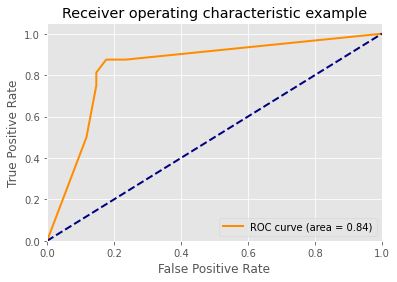

In [12]:
# 5.ROC曲线 decision_function
# 像其他scikit-learn分类器一样，它StackingCVClassifier具有decision_function可用于绘制ROC曲线的方法。
# 请注意，decision_function期望并要求元分类器实现decision_function。
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

iris = datasets.load_iris()
X, y = iris.data[:, [0, 1]], iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

RANDOM_SEED = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_SEED)

clf1 = LogisticRegression()
clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
clf3 = SVC(random_state=RANDOM_SEED)
lr = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                            meta_classifier=lr)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(sclf)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Blending与Stacking对比：**                               
Blending的优点在于：
   - 比stacking简单（因为不用进行k次的交叉验证来获得stacker feature）

而缺点在于：
   - 使用了很少的数据（是划分hold-out作为测试集，并非cv）
   - blender可能会过拟合（其实大概率是第一点导致的）
   - stacking使用多次的CV会比较稳健

# 4. 结语

在本章中，我们讨论了如何使用Blending和Stacking的方式去集成多个模型，相比于Bagging与Boosting的集成方式，Blending和Stacking的方式更加简单和直观，且效果还很好，因此在比赛中有这么一句话：它(Stacking)可以帮你打败当前学术界性能最好的算法  。那么截至目前为止，我们已经把所有的集成学习方式都讨论完了，接下来的第六章，我们将以几个大型的案例来展示集成学习的威力。